### Regresión lineal a través del decenso por gradiente
Eva Riva  
Pablo Barrando  
J. Paul Virueña

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

#### Creamos el dataframe de los datos y lo dividimos en conjunto de prueba y de entrenamiento

In [2]:
df = pd.read_csv('pesos_y_alturas_v1.csv')
train, test = train_test_split(df, test_size=0.3)

In [3]:
test['Altura']

4729    1.653951
1992    1.831083
8118    1.555246
2874    1.798810
3296    1.654067
          ...   
7001    1.572927
6940    1.585335
7240    1.681206
8857    1.600365
6159    1.732561
Name: Altura, Length: 3000, dtype: float64

In [4]:
test['Peso']

4729    69.457723
1992    95.311532
8118    48.122657
2874    92.796244
3296    70.931434
          ...    
7001    51.549869
6940    62.166483
7240    57.323325
8857    59.596201
6159    65.991749
Name: Peso, Length: 3000, dtype: float64

In [5]:
def calcula_parciales(set_length,X,Y,b0,b1):
    p0 = 0
    p1 = 0
    for i in range(0,set_length):
        #aquí no es está al reveso?
        p0 = ((b0+b1*X[i]) - Y[i]) + p0
        p1 = ((b0+b1*X[i]) - Y[i]) * X[i] + p1
    p0 = 1/set_length * p0
    p1 = 1/set_length * p1
        
    return p0,p1

In [6]:
sample_size = int(0.2*len(train))
#sample_size = int(len(train))
sample_train = train.sample(n=sample_size)
X = sample_train['Altura'].reset_index(drop = True) 
Y = sample_train['Peso'].reset_index(drop = True)  #la que quiero predecir
test_x = pd.DataFrame(test['Altura'])
test_y = pd.DataFrame(test['Peso'])

#Como no queremos que caiga en un ciclo infinito, asingamos una tolerancia arbitraria por ahora
tolerancia = 1e-10

# Para ayudar a disminuir ese riesgo, de la misma forma asignamos un numero máximo de iteraciones
max_iters = 10000

#Por último, asignamos otro valor arbitrario a la alfa 
alfa = 0.2


b0= 1
b1 = 1
i = 0
bandera1 = True
bandera2 = True

while bandera1 and bandera2:
    M = len(X)
    parcial_0, parcial_1 = calcula_parciales(M,X,Y,b0,b1)  
    b0 = b0 - (alfa * parcial_0)
    b1 = b1 - (alfa * parcial_1)
    
    T1 = abs(alfa*parcial_0)
    T2 = abs(alfa*parcial_1)
    
    i+=1
    
    if max(T1,T2) < tolerancia:
        bandera1 = False
    if i>=max_iters:
        bandera2 = False
print('b1: '+ str(bandera1))
print('b2: '+ str(bandera2))


b1: True
b2: False


In [7]:
b0,b1

(-162.60300014795564, 139.87292281954095)

In [8]:
def aplica_regresion_encontrada(set_lenght,x,b0,b1):
    y = []
    for i in range(0, set_lenght):
        y.append(b0 + b1*x[i])
    return y

In [9]:
tx = test_x.reset_index(drop=True)
ty = test_y.reset_index(drop=True)
pass

In [10]:
x = tx['Altura']
x

0       1.653951
1       1.831083
2       1.555246
3       1.798810
4       1.654067
          ...   
2995    1.572927
2996    1.585335
2997    1.681206
2998    1.600365
2999    1.732561
Name: Altura, Length: 3000, dtype: float64

In [11]:
y = aplica_regresion_encontrada(len(x),x,b0,b1)

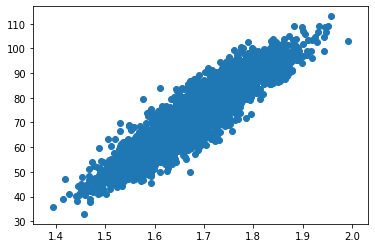

In [12]:
plt.scatter(test['Altura'], test['Peso'])
plt.show()

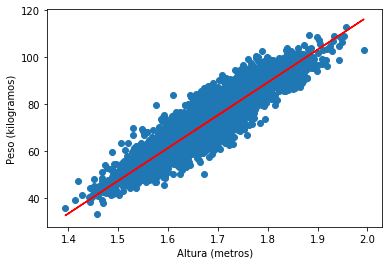

In [13]:
plt.figure()
plt.plot(x,y,'r')
plt.scatter(tx['Altura'], ty['Peso'])
plt.ylabel('Peso (kilogramos)')
plt.xlabel('Altura (metros)')
plt.show()

